In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [80]:
df = pd.read_csv("anime.csv", index_col=0)
df.head()

,name,genre,type,episodes,rating,members
anime_id,,,,,,
32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [81]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12294 entries, 32281 to 26081
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      12294 non-null  object 
 1   genre     12232 non-null  object 
 2   type      12269 non-null  object 
 3   episodes  12294 non-null  object 
 4   rating    12064 non-null  float64
 5   members   12294 non-null  int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 672.3+ KB


In [82]:
df.describe( include = "all" ) 

,name,genre,type,episodes,rating,members
count,12294,12232,12269,12294,12064.000000,1.229400e+04
unique,12292,3264,6,187,NaN,NaN
top,Shi Wan Ge Leng Xiaohua,Hentai,TV,1,NaN,NaN
freq,2,823,3787,5677,NaN,NaN
mean,NaN,NaN,NaN,NaN,6.473902,1.807134e+04
std,NaN,NaN,NaN,NaN,1.026746,5.482068e+04
min,NaN,NaN,NaN,NaN,1.670000,5.000000e+00
25%,NaN,NaN,NaN,NaN,5.880000,2.250000e+02
50%,NaN,NaN,NaN,NaN,6.570000,1.550000e+03
75%,NaN,NaN,NaN,NaN,7.180000,9.437000e+03


In [90]:
df = df[df["rating"]>=6 & (df["members"]>1000)]

df


,name,genre,type,episodes,rating,members
anime_id,,,,,,
32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...
2434,Kijoku: Princess Double Kari,Hentai,OVA,3,6.00,1368
24327,Oyome-sama Honey Days♥,Hentai,OVA,2,6.00,1403
2540,Tonari no Oneesan,"Comedy, Hentai",OVA,2,6.00,1756


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6174 entries, 32281 to 4541
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      6174 non-null   object 
 1   genre     6172 non-null   object 
 2   type      6174 non-null   object 
 3   episodes  6174 non-null   object 
 4   rating    6174 non-null   float64
 5   members   6174 non-null   int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 337.6+ KB


In [92]:
df[df['genre'].isna()]

,name,genre,type,episodes,rating,members
anime_id,,,,,,
33242,IS: Infinite Stratos 2 - Infinite Wedding,NaN,Special,1,7.15,6604
33589,ViVid Strike!,NaN,TV,12,6.96,12345


In [93]:
df = df.dropna(how='any')
final_data = df.drop_duplicates()
df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6172 entries, 32281 to 4541
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      6172 non-null   object 
 1   genre     6172 non-null   object 
 2   type      6172 non-null   object 
 3   episodes  6172 non-null   object 
 4   rating    6172 non-null   float64
 5   members   6172 non-null   int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 337.5+ KB


In [94]:
final_data.head()

,name,genre,type,episodes,rating,members
anime_id,,,,,,
32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


Apskaičiuojame kiekį kiekvienos anime rūšies.

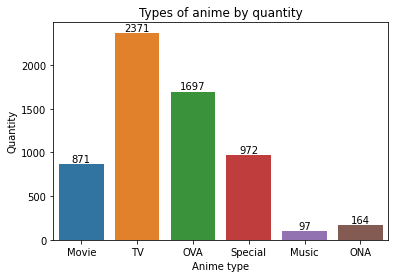

In [152]:
ax = sns.countplot(data=final_data, x ='type')
ax.bar_label(ax.containers[0])
ax.set_title('Types of anime by quantity')
ax.set(xlabel='Anime type', ylabel='Quantity')
plt.show()

Pagal diagramą matome, kad daugiausiai kartų žiūrima TV ir Movie anime.

Apskaičiuojame reitingų vidurkį ir vidutinį narių skaičių pagal anime tipus.

In [159]:
print("Based on average rating", final_data.groupby(['type']).mean()['rating'].sort_values(ascending=False))
print('')
print("Based on average members count", final_data.groupby('type')["members"].mean().sort_values(ascending=False))

Based on average rating type
Movie      7.345270
TV         7.284757
Special    7.009290
OVA        6.865315
Music      6.820206
ONA        6.810366
Name: rating, dtype: float64

Based on average members count type
TV         66972.030789
Movie      26921.319173
ONA        14913.103659
Special    12800.734568
OVA        10813.467295
Music       5397.309278
Name: members, dtype: float64


Diagramoje pateikta anime tipai pagal reitingus ir narių skaučių.

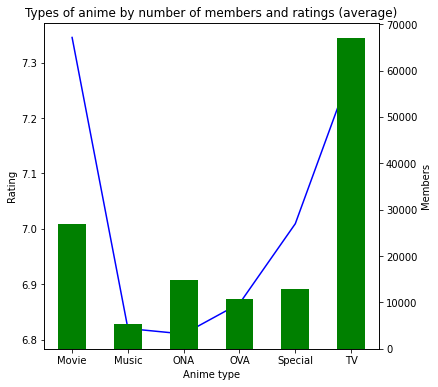

In [176]:
fig, ax = plt.subplots(figsize=(6,6))
p1 = final_data.groupby('type').mean()['rating'].plot(ax=ax, color = 'blue')
ax2=ax.twinx()
p2 = final_data.groupby('type').mean()['members'].plot( kind = "bar", color = 'green')
ax.set_ylabel('Rating') 
ax2.set_ylabel('Members') 
ax.set_xlabel('Anime type')
ax.set_title('Types of anime by number of members and ratings (average)')

plt.show()

In [13]:
top_10_rating = final_data.nlargest(n=10, columns=['rating'], keep = "all")
top_10_rating

,name,genre,type,episodes,rating,members
anime_id,,,,,,
32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
32935,Haikyuu!!: Karasuno Koukou VS Shiratorizawa Ga...,"Comedy, Drama, School, Shounen, Sports",TV,10,9.15,93351
11061,Hunter x Hunter (2011),"Action, Adventure, Shounen, Super Power",TV,148,9.13,425855
820,Ginga Eiyuu Densetsu,"Drama, Military, Sci-Fi, Space",OVA,110,9.11,80679
15417,Gintama&#039;: Enchousen,"Action, Comedy, Historical, Parody, Samurai, S...",TV,13,9.11,81109


In [14]:
top_10_members = final_data.nlargest(n=10, columns=['members'], keep = "all")
top_10_members

,name,genre,type,episodes,rating,members
anime_id,,,,,,
1535,Death Note,"Mystery, Police, Psychological, Supernatural, ...",TV,37,8.71,1013917
16498,Shingeki no Kyojin,"Action, Drama, Fantasy, Shounen, Super Power",TV,25,8.54,896229
11757,Sword Art Online,"Action, Adventure, Fantasy, Game, Romance",TV,25,7.83,893100
5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
6547,Angel Beats!,"Action, Comedy, Drama, School, Supernatural",TV,13,8.39,717796
1575,Code Geass: Hangyaku no Lelouch,"Action, Mecha, Military, School, Sci-Fi, Super...",TV,25,8.83,715151
20,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
10620,Mirai Nikki (TV),"Action, Mystery, Psychological, Shounen, Super...",TV,26,8.07,657190


In [15]:
top_10_combined = top_10_rating.assign(result=top_10_rating['name'].isin(top_10_members['name']))
top_10_combined[top_10_combined['result'] == True]

,name,genre,type,episodes,rating,members,result
anime_id,,,,,,,
5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665,True
9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572,True


In [16]:
# # # movies ir ona analize
# # gal pasikeisti index i type ir tada viska filtruori
# grouped = wine_df_clean.groupby ( ['country', 'province'])[['points', 'price']].mean() #reikia nurodyti kaip grupuoti vertes - skaicius
# grouped
# grouped.loc["Australia"]

In [17]:
genre_count = final_data ['genre'].value_counts().nlargest(n=15, keep = "all")
df=pd.DataFrame(genre_count)

df = df.reset_index()

df

,index,genre
0,Hentai,507
1,Comedy,136
2,Music,69
3,"Comedy, Slice of Life",58
4,"Comedy, School, Slice of Life",55
5,"Adventure, Comedy, Mystery, Police, Shounen",32
6,"Action, Mecha, Sci-Fi",31
7,"Action, Adventure, Comedy, Shounen",30
8,"Comedy, Parody",29
9,"Adventure, Mecha, Sci-Fi, Shounen",26


<AxesSubplot:xlabel='index', ylabel='genre'>

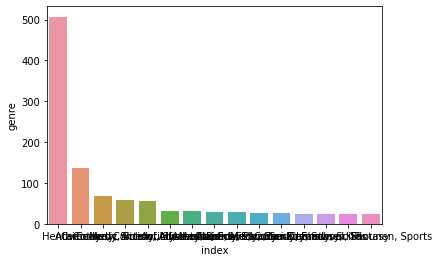

In [18]:
sns.barplot(data=df, x = "index", y="genre")

In [19]:
def genre_identification (str):
    result_text = ''
    if "Comedy" in str:
        result_text += "Comedy "
    if "Fantasy" in str:
        result_text += "Fantasy "
    if "Adventure" in str:
        result_text += "Adventure "
    if "Romance" in str:
        result_text += "Romance "    
    # if "Action" in str:
    #     result_text += "Action "  
    return (result_text)

final_data["filtered_genre"]= final_data["genre"].map(genre_identification)

final_data  

,name,genre,type,episodes,rating,members,filtered_genre
anime_id,,,,,,,
8365,Crayon Shin-chan Movie 13: Densetsu wo Yobu Bu...,"Comedy, Ecchi, Kids, School, Shounen, Slice of...",Movie,1,6.85,1001,Comedy
7336,Cyborg 009: Chou Ginga Densetsu,"Action, Sci-Fi, Space",Movie,1,6.59,1003,
31113,Puchitto Furikaerintia,"Action, Adventure, Mecha, Sci-Fi",Special,1,6.33,1003,Adventure
5652,Glass no Kantai: La Legende du Vent de l&#039;...,"Adventure, Sci-Fi",Special,2,6.36,1005,Adventure
988,Shinshaku Sengoku Eiyuu Densetsu: Sanada Juu Y...,"Action, Comedy, Historical, Military, Samurai",TV,12,6.51,1006,Comedy
...,...,...,...,...,...,...,...
6547,Angel Beats!,"Action, Comedy, Drama, School, Supernatural",TV,13,8.39,717796,Comedy
5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665,Fantasy Adventure
11757,Sword Art Online,"Action, Adventure, Fantasy, Game, Romance",TV,25,7.83,893100,Fantasy Adventure Romance


In [20]:
final_data['filtered_genre'].value_counts()

                                     1994
Comedy                               1296
Comedy Romance                        498
Adventure                             384
Romance                               363
Fantasy                               349
Comedy Fantasy Adventure              265
Comedy Adventure                      259
Fantasy Adventure                     251
Comedy Fantasy                        186
Fantasy Romance                        73
Comedy Fantasy Romance                 71
Comedy Adventure Romance               48
Fantasy Adventure Romance              46
Adventure Romance                      46
Comedy Fantasy Adventure Romance       43
Name: filtered_genre, dtype: int64

<AxesSubplot:ylabel='type'>

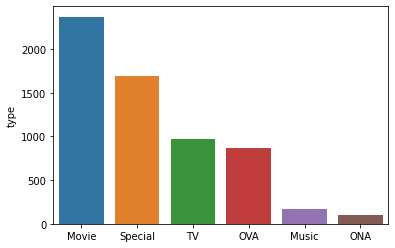

In [21]:
sns.barplot(data=final_data, x = type_unique, y=type_count)

In [22]:
#KLAUSIMAS

In [23]:
final_data.head() # visa data

,name,genre,type,episodes,rating,members,filtered_genre
anime_id,,,,,,,
8365,Crayon Shin-chan Movie 13: Densetsu wo Yobu Bu...,"Comedy, Ecchi, Kids, School, Shounen, Slice of...",Movie,1,6.85,1001,Comedy
7336,Cyborg 009: Chou Ginga Densetsu,"Action, Sci-Fi, Space",Movie,1,6.59,1003,
31113,Puchitto Furikaerintia,"Action, Adventure, Mecha, Sci-Fi",Special,1,6.33,1003,Adventure
5652,Glass no Kantai: La Legende du Vent de l&#039;...,"Adventure, Sci-Fi",Special,2,6.36,1005,Adventure
988,Shinshaku Sengoku Eiyuu Densetsu: Sanada Juu Y...,"Action, Comedy, Historical, Military, Samurai",TV,12,6.51,1006,Comedy
